In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import median

pd.set_option('display.float_format',lambda x: '%.4f' % x)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_palette('bone')

In [2]:
data = pd.read_csv('kaggle_bankruptcy_data.csv')
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                             0.3706          
1          1                                             0.4643          
2          1                                             0.4261          
3          1                                             0.3998          
4          1                                             0.4650          

    ROA(A) before interest and % after tax  \
0                                   0.4244   
1                                   0.5382   
2                                   0.4990   
3                                   0.4513   
4                                   0.5384   

    ROA(B) before interest and depreciation after tax  \
0                                             0.4057    
1                                             0.5167    
2                                             0.4723    
3                                             0.4577    
4                                             0.5223    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                   0.6015                        0.6015   
1                   0.6102                        0.6102   
2                   0.6015                        0.6014   
3                   0.5835                        0.5835   
4                   0.5988                        0.5988   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                  0.9990                      0.7969   
1                  0.9989                      0.7974   
2                  0.9989                      0.7964   
3                  0.9987                      0.7970   
4                  0.9990                      0.7974   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                        0.8088                                        0.3026   
1                        0.8093                                        0.3036   
2                        0.8084                                        0.3020   
3                        0.8090                                        0.3033   
4                        0.8093                                        0.3035   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                       0.7168                      0.0092   
1  ...                       0.7953                      0.0083   
2  ...                       0.7747                      0.0400   
3  ...                       0.7396                      0.0033   
4  ...                       0.7950                      0.0039   

    No-credit Interval   Gross Profit to Sales  \
0               0.6229                  0.6015   
1               0.6237                  0.6102   
2               0.6238                  0.6014   
3               0.6229                  0.5835   
4               0.6235                  0.5988   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                               0.8279                0.2902   
1                               0.8400                0.2838   
2                               0.8368                0.2902   
3                               0.8347                0.2817   
4                               0.8400                0.2785   

    Degree of Financial Leverage (DFL)  \
0                               0.0266   
1                               0.2646   
2                               0.0266   
3                               0.0267   
4                               0.0248   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                             0.5641                   1   
1                                             0.5702                   1   
2                                             0.5637                   1   
3                                             0.5647                   1   
4                        

In [3]:
df = data.copy()

In [4]:
print('Null:' + str(df.isnull().sum().sum()))

Null:0


In [5]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.0000                                          6819.0000          
mean      0.0323                                             0.5052          
std       0.1767                                             0.0607          
min       0.0000                                             0.0000          
25%       0.0000                                             0.4765          
50%       0.0000                                             0.5027          
75%       0.0000                                             0.5356          
max       1.0000                                             1.0000          

        ROA(A) before interest and % after tax  \
count                                6819.0000   
mean                                    0.5586   
std                                     0.0656   
min                                     0.0000   
25%                                     0.5355   
50%                                     0.5598   
75%                                     0.5892   
max                                     1.0000   

        ROA(B) before interest and depreciation after tax  \
count                                          6819.0000    
mean                                              0.5536    
std                                               0.0616    
min                                               0.0000    
25%                                               0.5273    
50%                                               0.5523    
75%                                               0.5841    
max                                               1.0000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count                6819.0000                     6819.0000   
mean                    0.6079                        0.6079   
std                     0.0169                        0.0169   
min                     0.0000                        0.0000   
25%                     0.6004                        0.6004   
50%                     0.6060                        0.6060   
75%                     0.6139                        0.6138   
max                     1.0000                        1.0000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count               6819.0000                   6819.0000   
mean                   0.9988                      0.7972   
std                    0.0130                      0.0129   
min                    0.0000                      0.0000   
25%                    0.9990                      0.7974   
50%                    0.9990                      0.7975   
75%                    0.9991                      0.7976   
max                    1.0000                      1.0000   

        After-tax net Interest Rate  \
count                     6819.0000   
mean                         0.8091   
std                          0.0136   
min                          0.0000   
25%                          0.8093   
50%                          0.8094   
75%                          0.8095   
max                          1.0000   

        Non-industry income and expenditure/revenue  ...  \
count                                     6819.0000  ...   
mean                                         0.3036  ...   
std                                          0.0112  ...   
min                                          0.0000  ...   
25%                                          0.3035  ...   
50%                                          0.3035  ...   
75%                                          0.3036  ...   
max                                          1.0000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                    6819.0000                   6819.0000   
mean                        0.8078               18629417.8118   
std                         0.0403              376450059.7458   
min                

In [6]:
df.columns = [i.title().strip() for i in list(df.columns)]

In [7]:
print(df.dtypes[df.dtypes == 'int64'])

Bankrupt?                int64
Liability-Assets Flag    int64
Net Income Flag          int64
dtype: object


In [8]:
cat_feat = df[['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']].columns.to_list()
num_feat = df.drop(cat_feat, axis = 1).columns.to_list()

#### Categorical Data

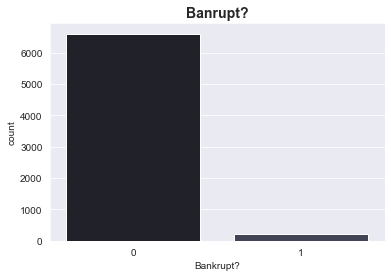

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [9]:
sns.countplot(x = df['Bankrupt?'])
plt.title('Banrupt?', fontsize = 14, weight = 'bold')
plt.show()
print(df['Bankrupt?'].value_counts())

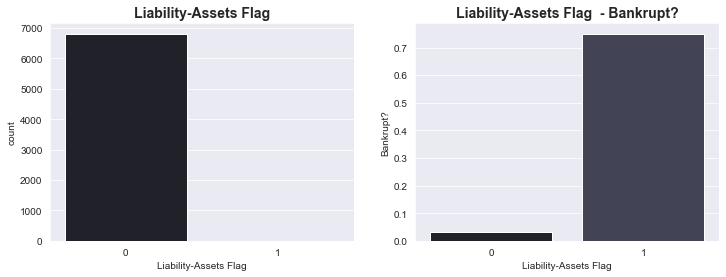

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64 


Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.countplot(x=df['Liability-Assets Flag'])
plt.title('Liability-Assets Flag', fontsize = 14, weight = 'bold')
plt.subplot(1,2,2)
sns.barplot(x=df['Liability-Assets Flag'], y=df['Bankrupt?'], ci=None)
plt.title('Liability-Assets Flag  - Bankrupt?', fontsize = 14, weight = 'bold')
plt.show()
print(df['Liability-Assets Flag'].value_counts(),'\n\n')
print(df[['Liability-Assets Flag', 'Bankrupt?']].value_counts())

幾乎所有公司的負債皆小於資產，其中有214間公司破產；而負債大於資產的公司中有6間面臨破產。

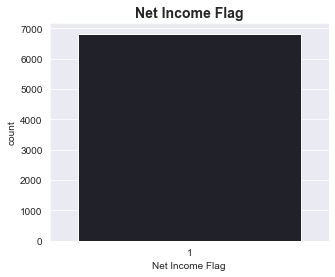

1    6819
Name: Net Income Flag, dtype: int64 


Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


In [11]:
sns.set_style('darkgrid')
plt.figure(figsize = (5,4))
sns.countplot(x=df['Net Income Flag'])
plt.title('Net Income Flag', fontsize = 14, weight = 'bold')
plt.show()
print(df['Net Income Flag'].value_counts(),'\n\n')
print(df[['Net Income Flag', 'Bankrupt?']].value_counts())

所有公司近兩年的淨收入皆為正，但仍有220間公司面臨破產。

In [12]:
df.drop('Net Income Flag', axis=1, inplace=True)

#### Numerical data

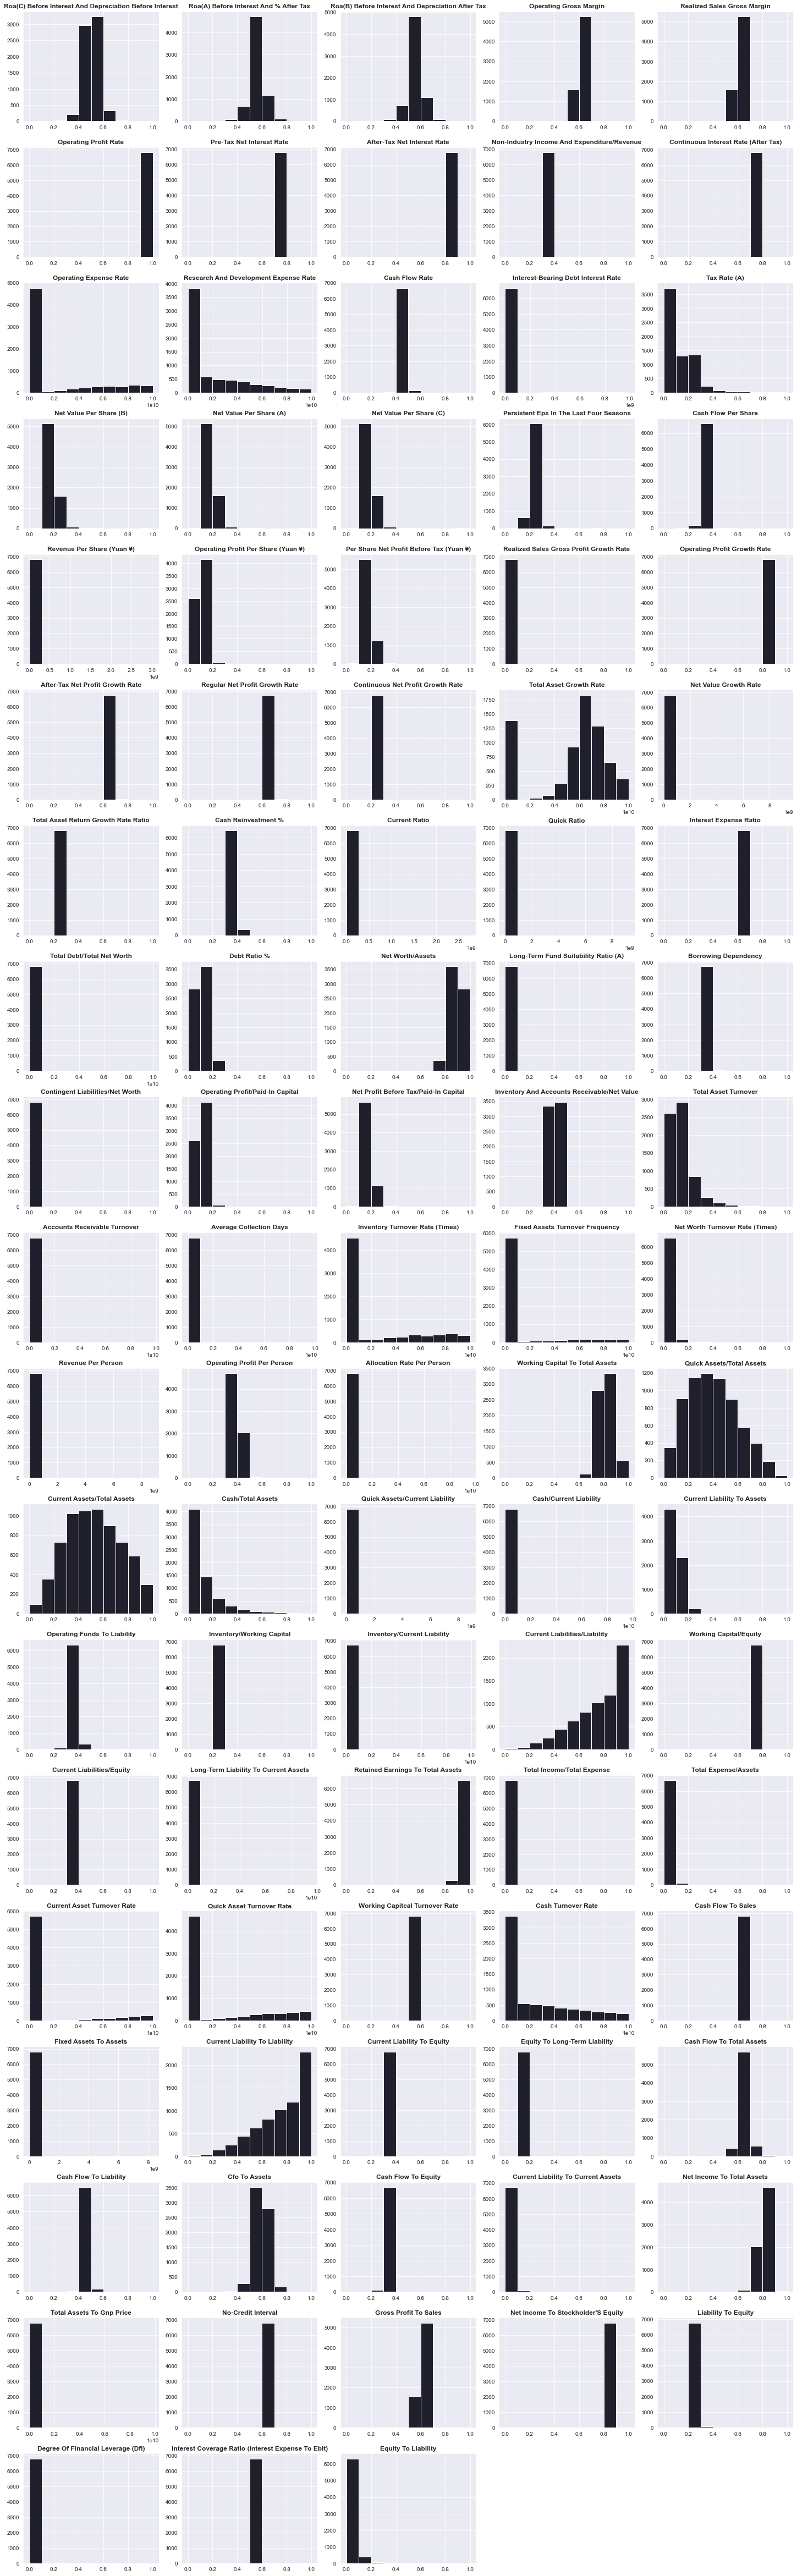

In [13]:
plt.figure(figsize=(20,65))
for i in range(len(num_feat)):
    plt.subplot(19,5,i+1)
    plt.hist(x=df[num_feat[i]])
    plt.title(num_feat[i], weight='bold')
plt.tight_layout(pad=0.5)    
plt.show()

In [14]:
positive_corr = df[num_feat].corrwith(df['Bankrupt?'])[df[num_feat].corrwith(df['Bankrupt?'])>0].sort_values(ascending=False).index.tolist()
negative_corr = df[num_feat].corrwith(df['Bankrupt?'])[df[num_feat].corrwith(df['Bankrupt?'])<0].sort_values().index.tolist()

In [15]:
print('Positive corr:',len(positive_corr), '\nNagetive corr:', len(negative_corr))

Positive corr: 28 
Nagetive corr: 65


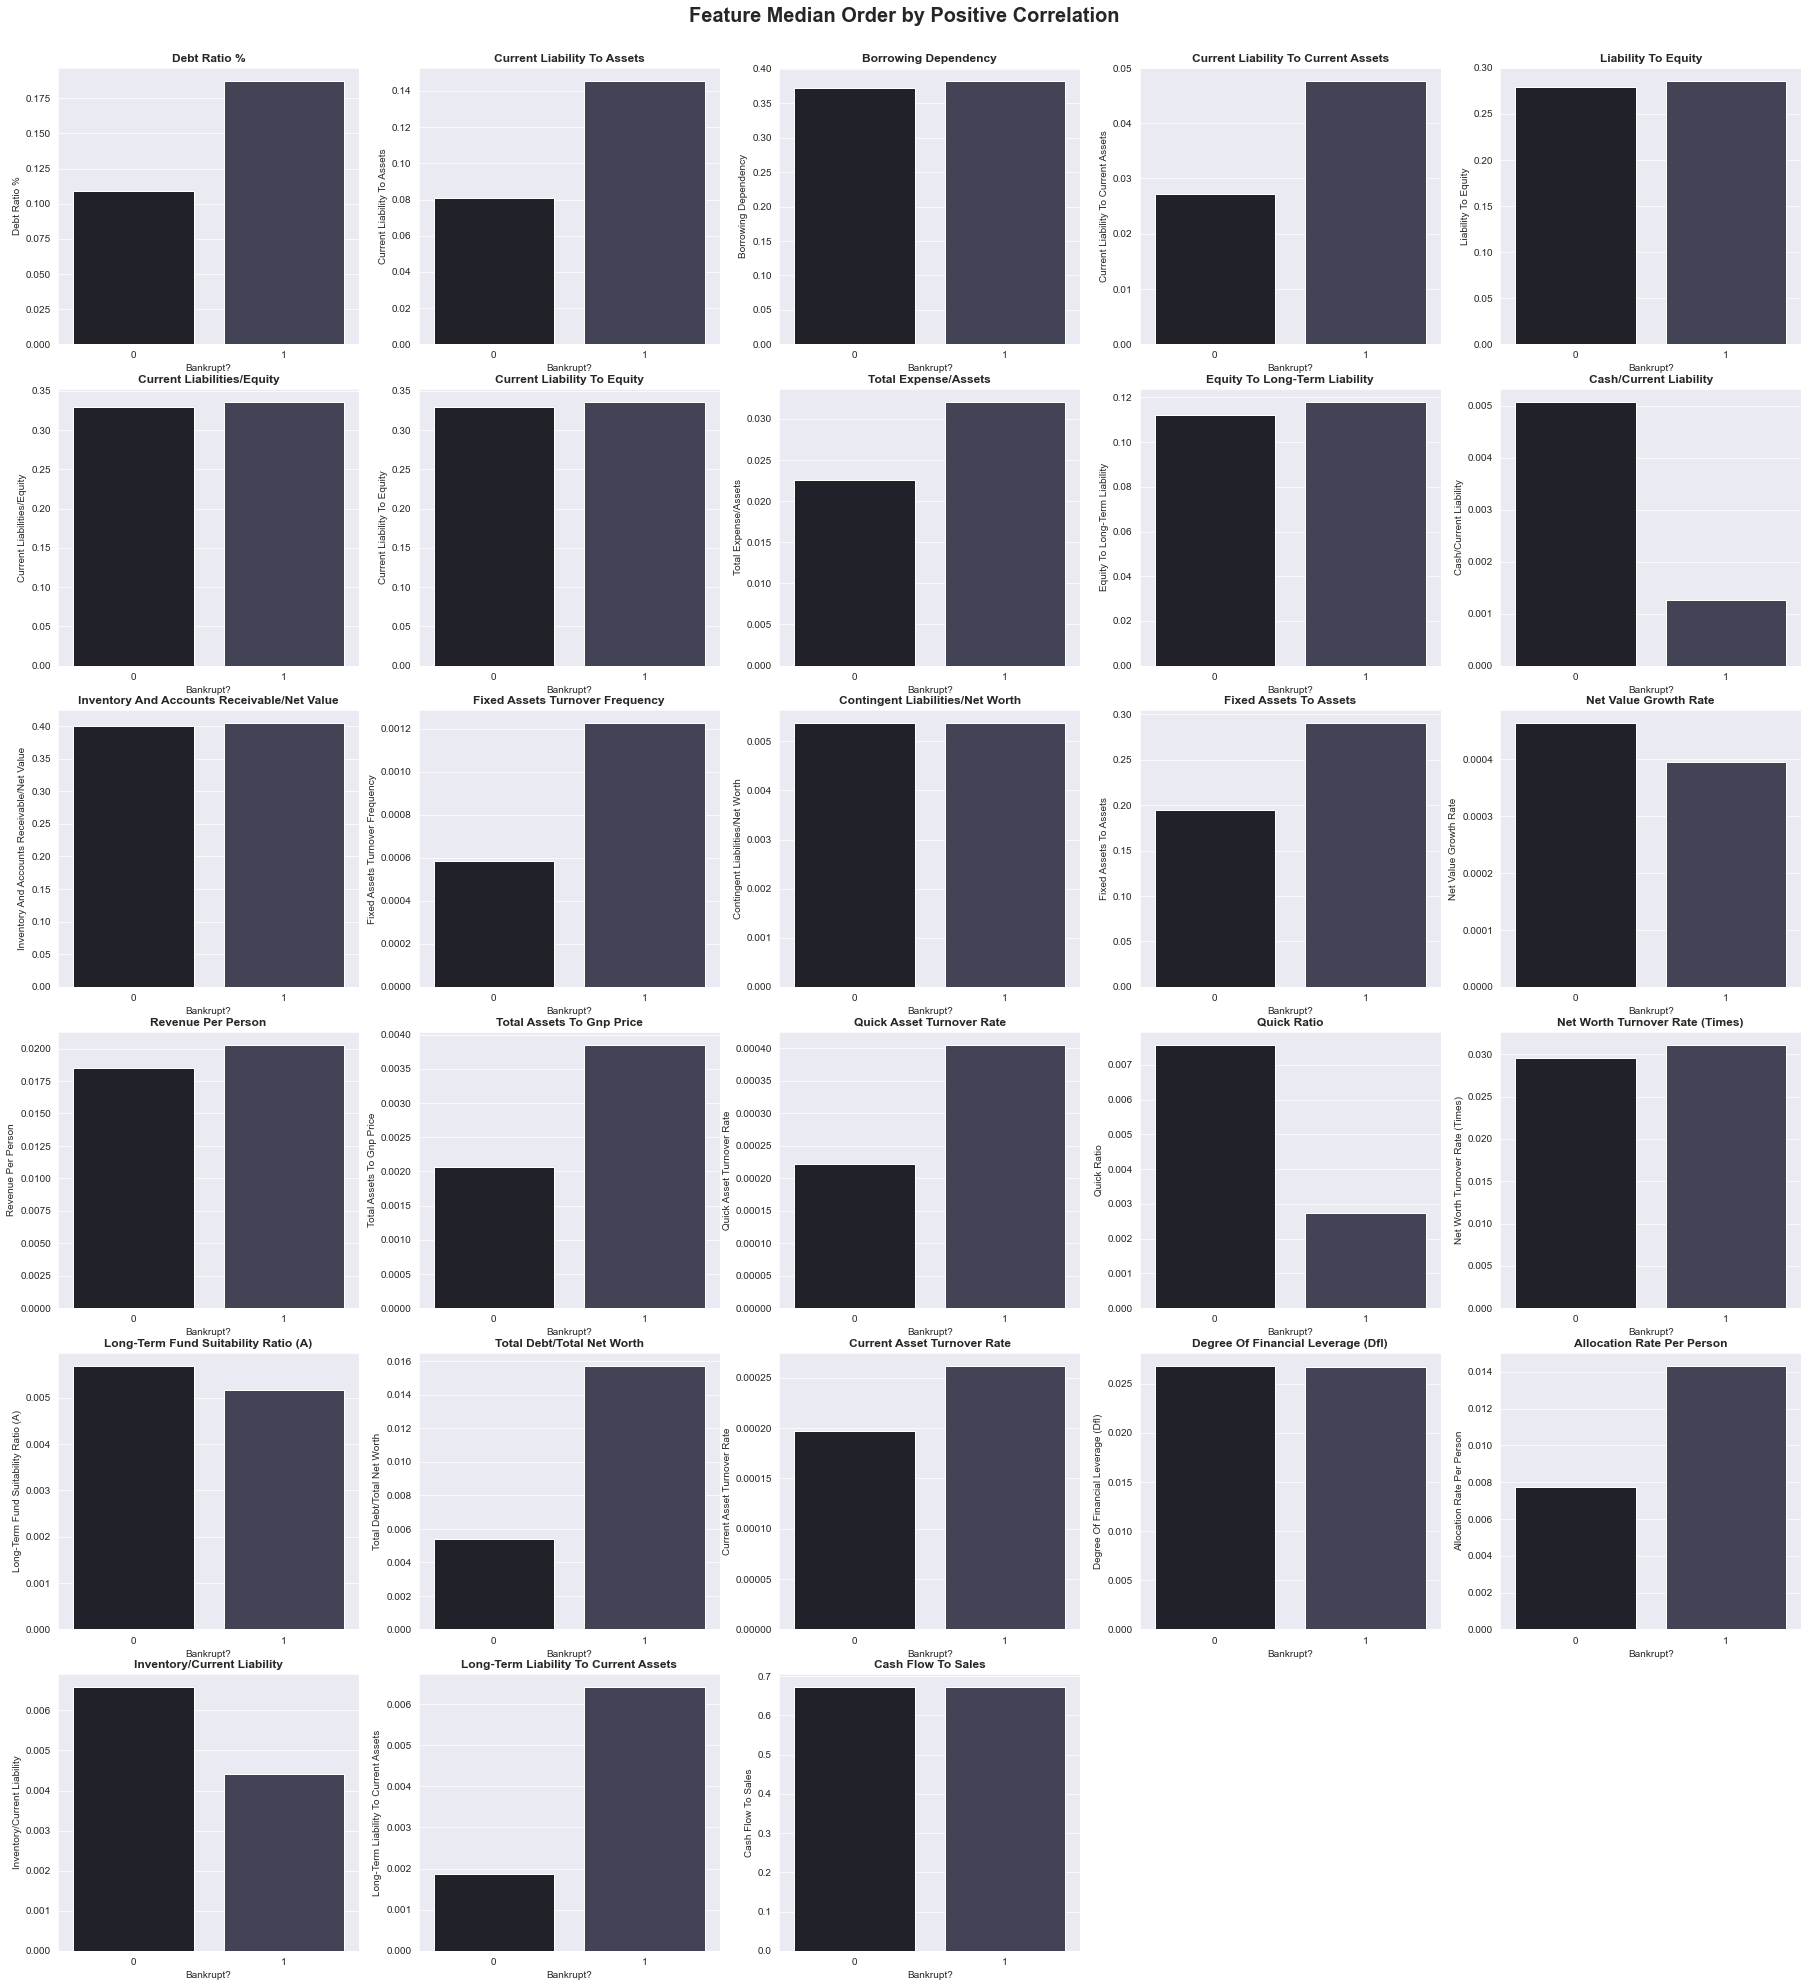

In [16]:
plt.figure(figsize=(25,28))
for i in range(len(positive_corr)):
    plt.subplot(6,5,i+1)
    sns.barplot(x='Bankrupt?', y = positive_corr[i], data = df, ci=None, estimator=median)
    plt.title(positive_corr[i], weight='bold')
plt.suptitle('Feature Median Order by Positive Correlation', fontsize=20, weight='bold')
plt.tight_layout(pad=0.3)
plt.subplots_adjust(top=0.95)
plt.show()

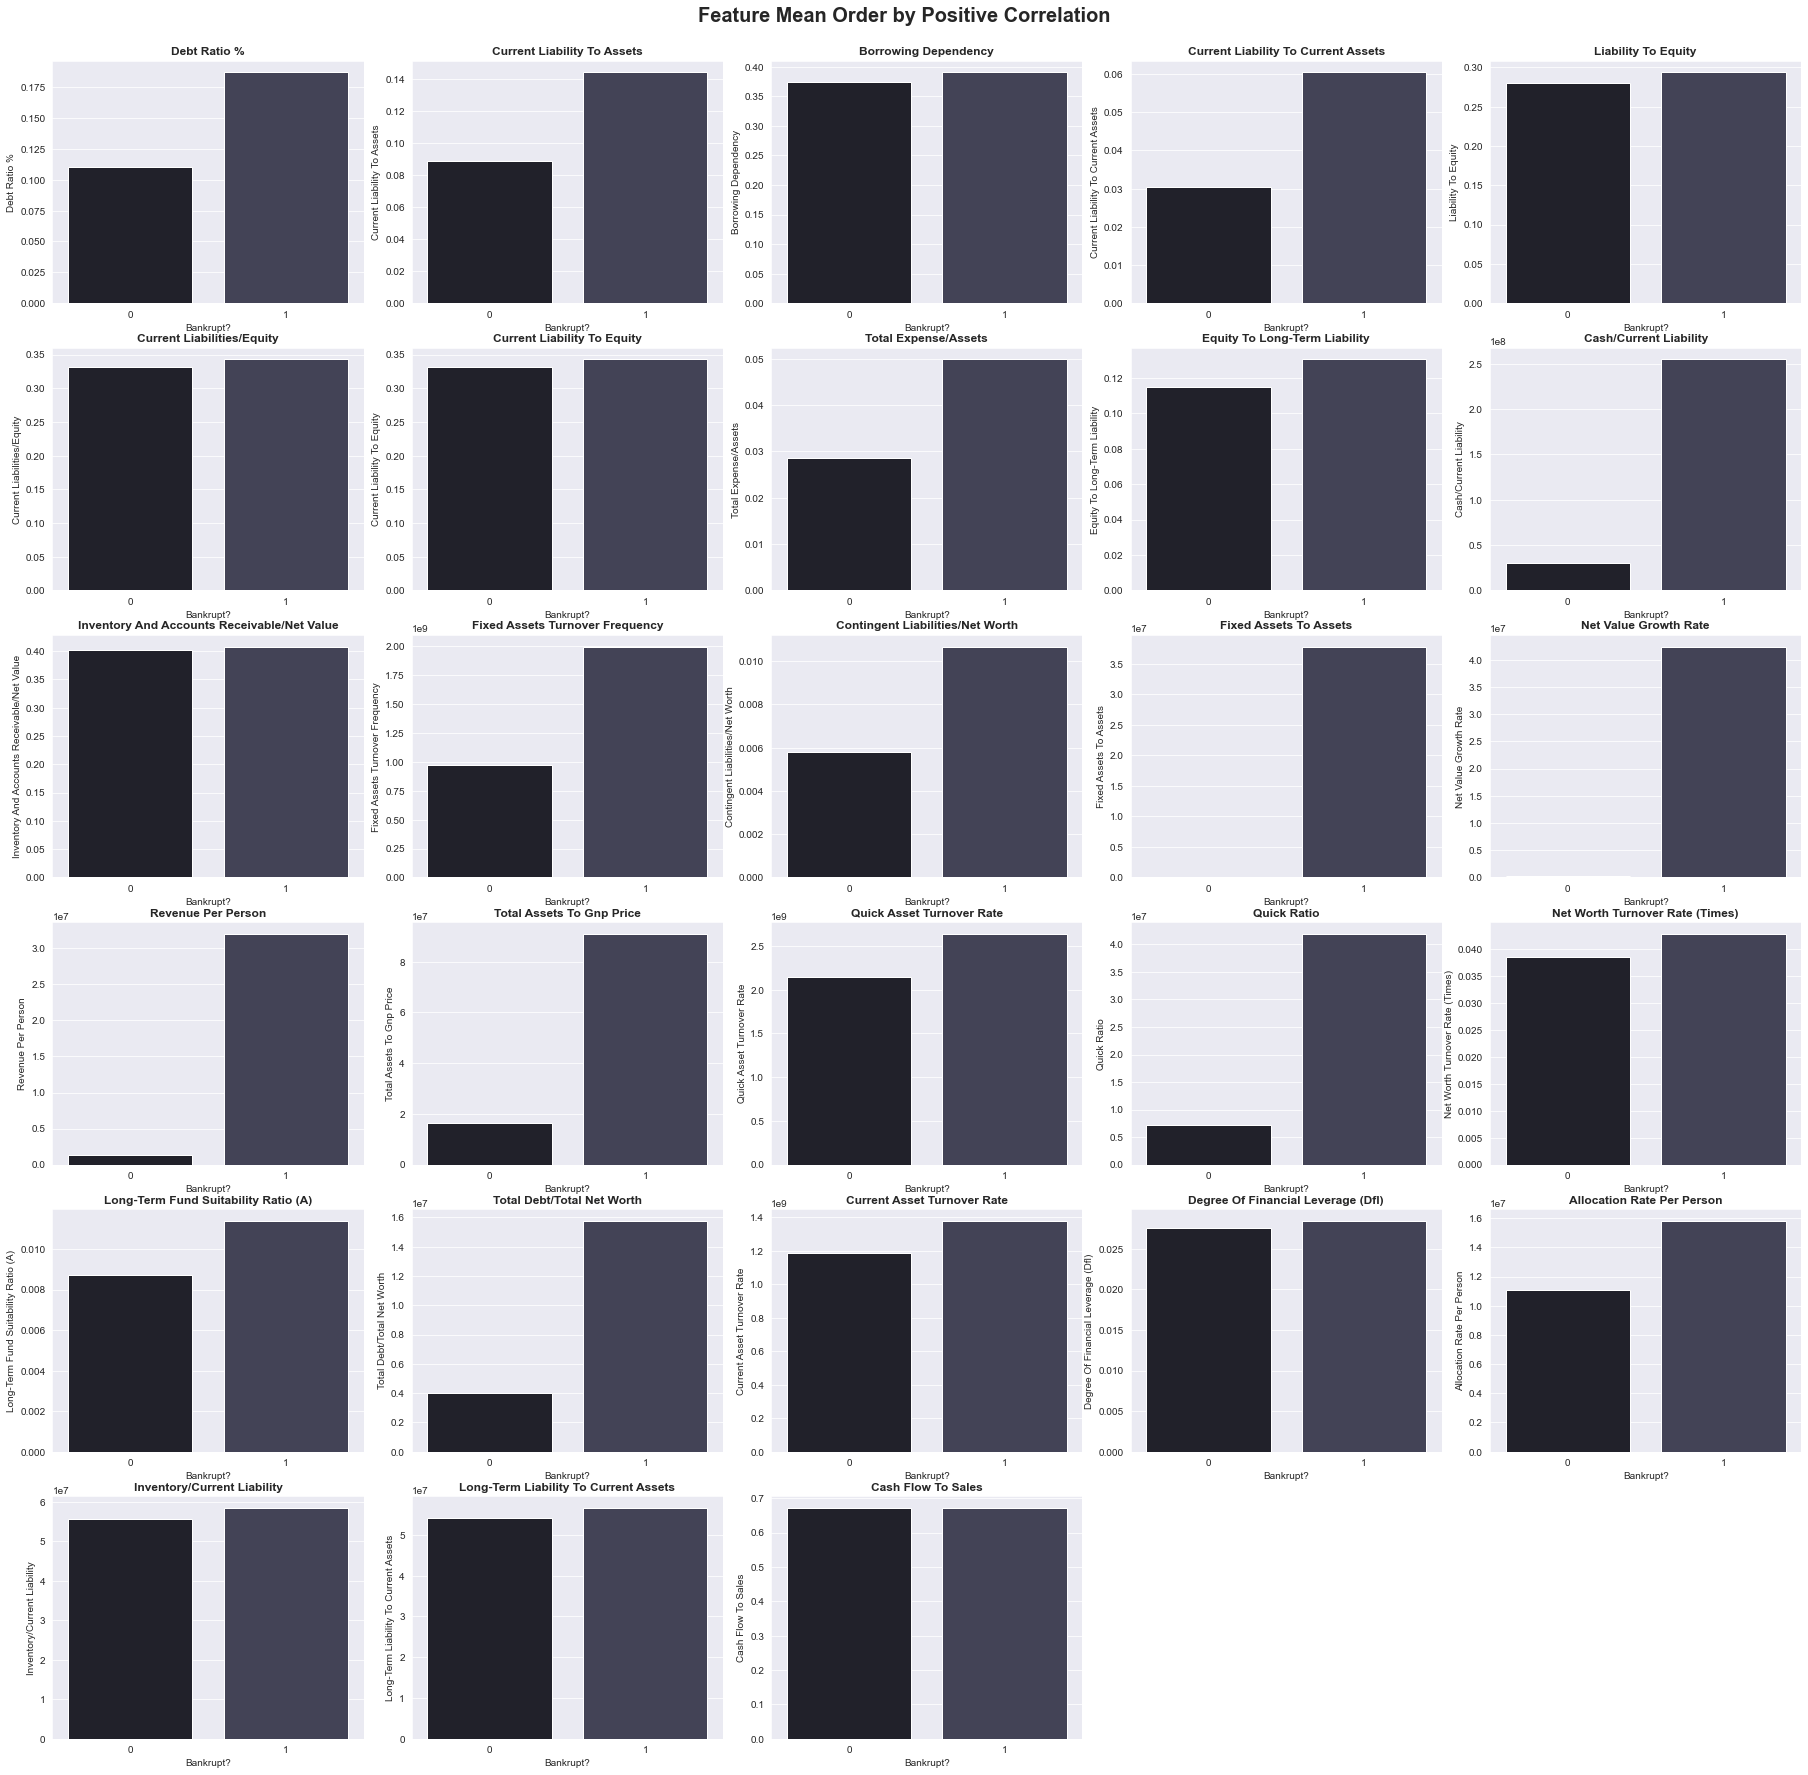

In [17]:
plt.figure(figsize=(25,25))
for i in range(len(positive_corr)):
    plt.subplot(6,5,i+1)
    sns.barplot(x='Bankrupt?', y = positive_corr[i], data = df, ci=None)
    plt.title(positive_corr[i], weight='bold')
plt.suptitle('Feature Mean Order by Positive Correlation', fontsize=20, weight='bold')
plt.tight_layout(pad=0.3)
plt.subplots_adjust(top=0.95)
plt.show()

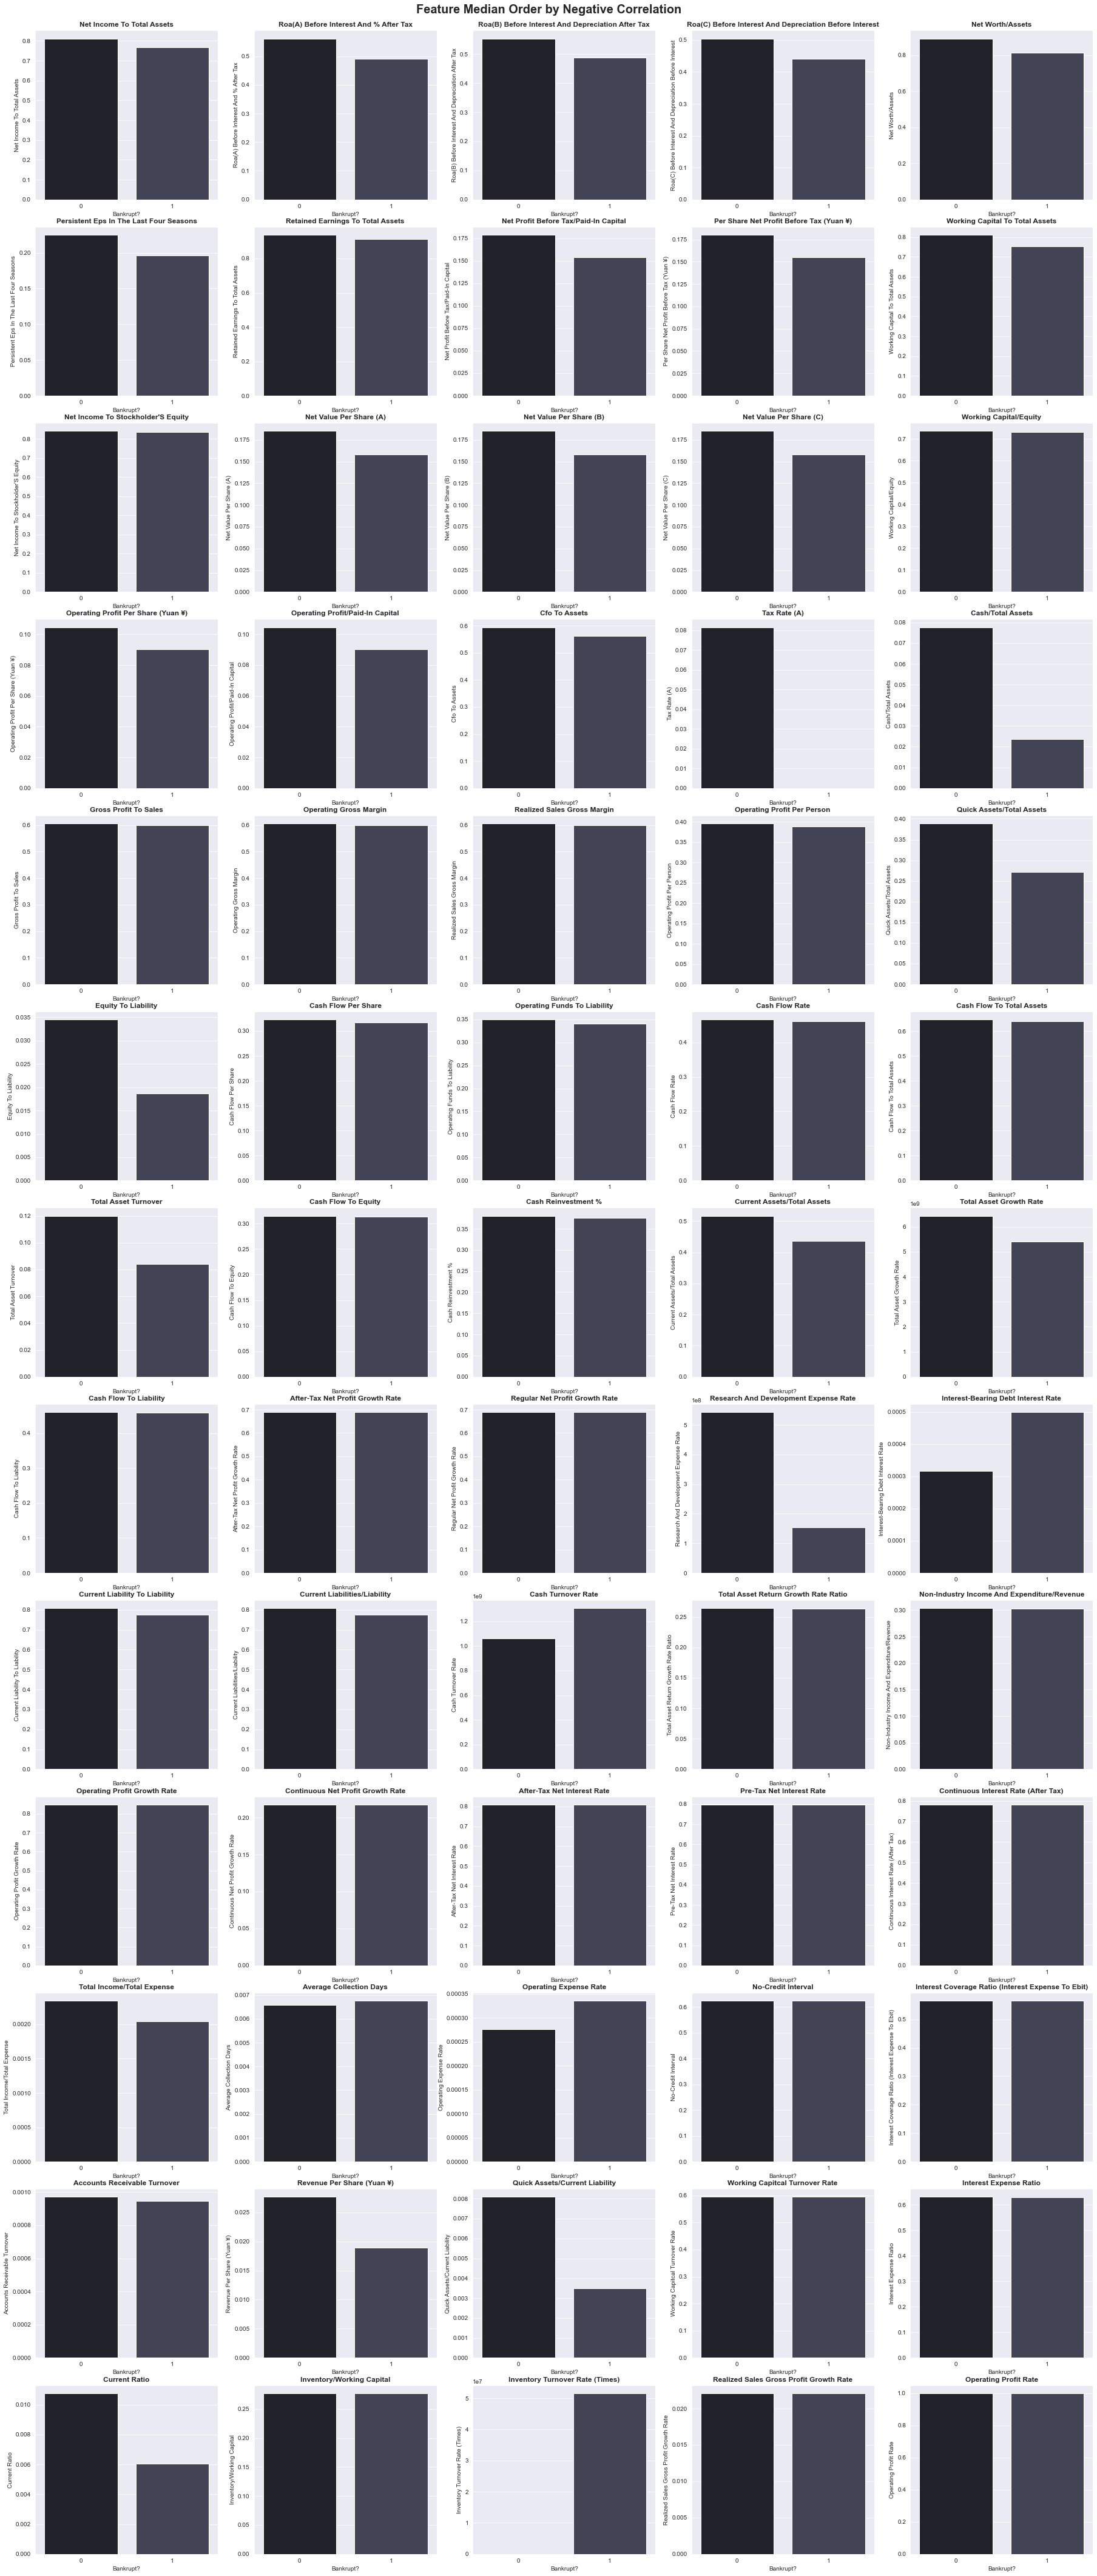

In [18]:
plt.figure(figsize=(25,60))
for i in range(len(negative_corr)):
    plt.subplot(13,5,i+1)
    sns.barplot(x='Bankrupt?', y=negative_corr[i], data=df, ci=None, estimator=median)
    plt.title(negative_corr[i], weight='bold')
plt.suptitle('Feature Median Order by Negative Correlation', fontsize=20, weight='bold')
plt.tight_layout(pad=0.3)
plt.subplots_adjust(top=0.97)
plt.show()

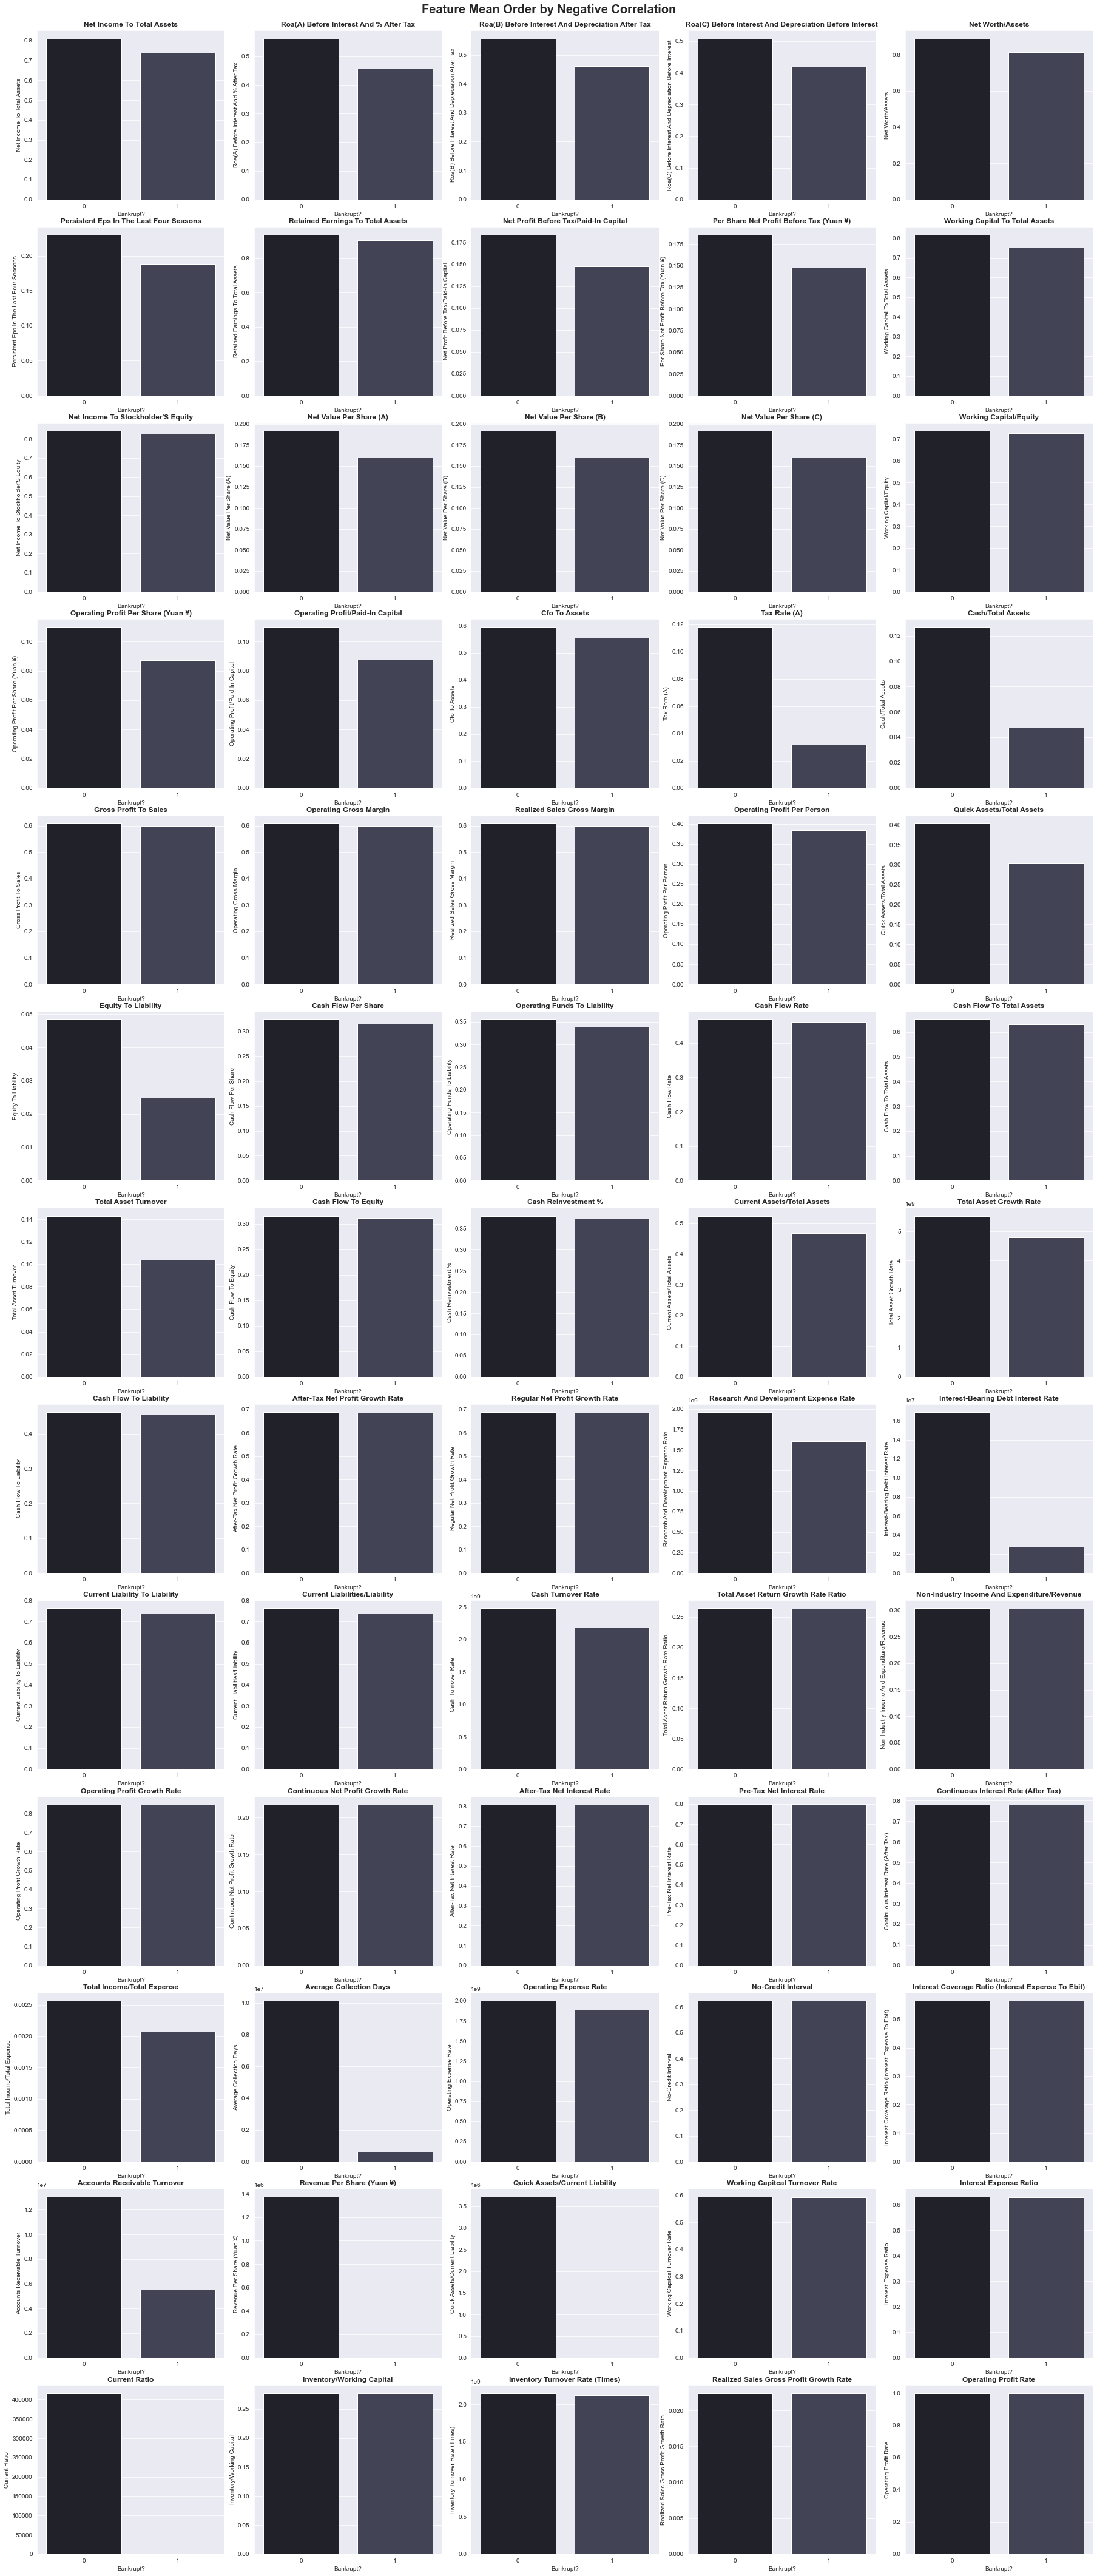

In [19]:
plt.figure(figsize=(25,60))
for i in range(len(negative_corr)):
    plt.subplot(13,5,i+1)
    sns.barplot(x='Bankrupt?', y=negative_corr[i], data=df, ci=None)
    plt.title(negative_corr[i], weight='bold')
plt.suptitle('Feature Mean Order by Negative Correlation', fontsize=20, weight='bold')
plt.tight_layout(pad=0.3)
plt.subplots_adjust(top=0.97)
plt.show()

In [20]:
df1 = df.copy()

#### Reducing Feature

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [22]:
def corr_without_out(data,target,col):
    data_1 = data.copy()
    n = 5
    IQR = data_1[col].quantile(.75) - data_1[col].quantile(.25)
    upper = data_1[col].quantile(.75) + IQR * n
    lower = data_1[col].quantile(.25) - IQR * n
    data_1.drop(data_1[data_1[col] > upper].index, axis=0, inplace=True)
    data_1.drop(data_1[data_1[col] < lower].index, axis=0, inplace=True)
    corr = abs(data_1[[col]].corrwith(data_1[target]))
    
    return corr

In [23]:
df_corr = pd.DataFrame()
df_corr['Feature'] = df1.columns.to_list()
df_corr['abs_corr'] = [corr_without_out(df1, 'Bankrupt?', i)[0] for i in df1.columns.to_list()]
df_corr['original_corr'] = df1[df_corr['Feature']].corrwith(df1['Bankrupt?']).values

In [24]:
df_corr.sort_values('abs_corr', ascending=False)[:10]

Feature  abs_corr  original_corr
40                               Borrowing Dependency    0.3082         0.1765
90                 Net Income To Stockholder'S Equity    0.2718        -0.1810
36                         Total Debt/Total Net Worth    0.2593         0.0123
38                                   Net Worth/Assets    0.2557        -0.2502
37                                       Debt Ratio %    0.2557         0.2502
19            Persistent Eps In The Last Four Seasons    0.2547        -0.2196
86                         Net Income To Total Assets    0.2519        -0.3155
1   Roa(C) Before Interest And Depreciation Before...    0.2511        -0.2608
91                                Liability To Equity    0.2510         0.1668
43              Net Profit Before Tax/Paid-In Capital    0.2507        -0.2079

In [25]:
df1.drop(df_corr[df_corr['abs_corr']<0.1]['Feature'].tolist(), axis=1, inplace=True)

In [26]:
num_feat = df1.drop(['Bankrupt?','Liability-Assets Flag'], axis=1).columns.to_list()

In [27]:
def VIF(variables, data):
    x = data[variables]
    x = add_constant(data)
    vif = pd.DataFrame()
    vif['Feature'] = x.columns
        
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    vif = vif[vif['Feature']!='const']
    return vif

In [28]:
VIF(df1.columns[1:].tolist(), df1)[VIF(df1.columns[1:].tolist(), df1)['VIF']>10].sort_values('VIF', ascending=False).head(10)

Feature                VIF
32                             Net Worth/Assets 2343793717080.6641
31                                 Debt Ratio %  253068084253.2308
50                  Current Liability To Equity  180707793410.2599
45                   Current Liabilities/Equity  149892650392.5878
7                         Operating Profit Rate   40450706444.6695
8                     Pre-Tax Net Interest Rate   11053880498.4273
10  Non-Industry Income And Expenditure/Revenue    2094621510.1827
5                        Operating Gross Margin      67071616.1853
57                        Gross Profit To Sales      67048202.8825
16                      Net Value Per Share (A)          3905.6763

In [29]:
while VIF(df1.columns[1:].tolist(), df1).sort_values('VIF', ascending=False).iloc[0,1] > 10:
    df1.drop(VIF(df1.columns[1:].tolist(), df1).sort_values('VIF', ascending=False).iloc[0,0], axis=1, inplace=True)

In [30]:
VIF(df1.columns[1:].tolist(), df1).sort_values('VIF',ascending=False).head()

Feature    VIF
39                         Net Income To Total Assets 9.2091
2   Roa(C) Before Interest And Depreciation Before... 7.6602
12           Per Share Net Profit Before Tax (Yuan ¥) 7.4769
29                       Operating Funds To Liability 7.1654
21                                       Debt Ratio % 6.8627

In [31]:
df2 = df1.copy()

In [32]:
num_feat = df2.drop(['Bankrupt?','Liability-Assets Flag'], axis=1).columns.to_list()

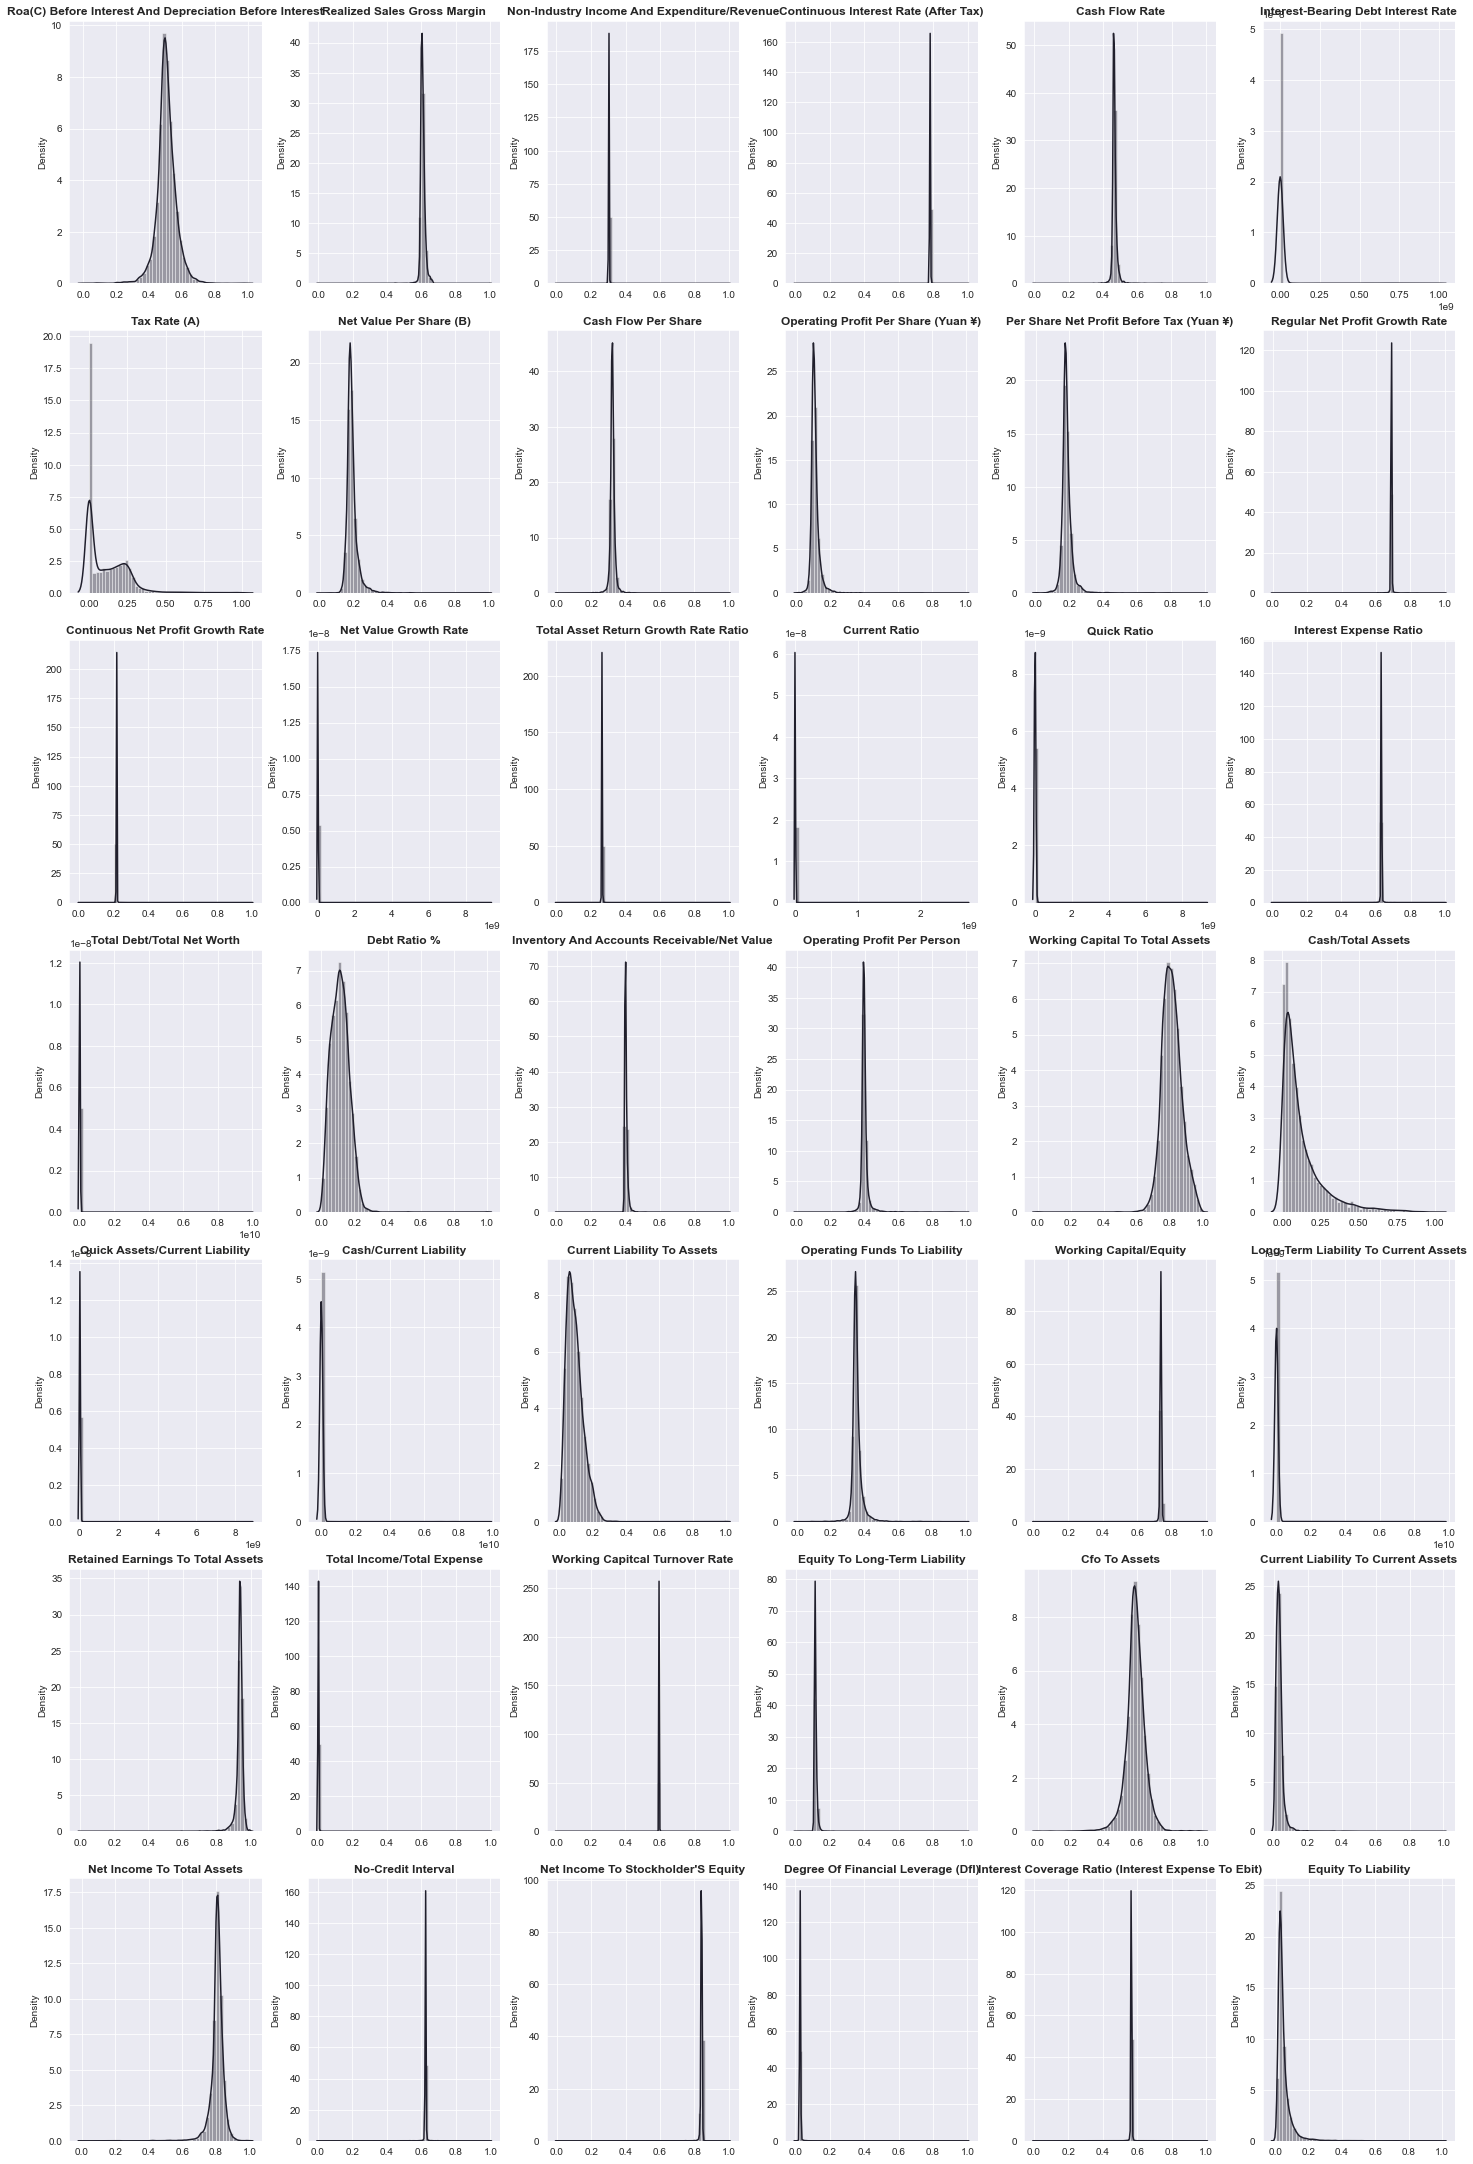

In [33]:
plt.figure(figsize=(20,30))
for i in range(len(num_feat)):
    plt.subplot(7,6,i+1)
    sns.distplot(x=df2[num_feat[i]])
    plt.title(num_feat[i], weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

In [34]:
def group_outlier(data,col,target_col,target_val):
    data_1 = data.copy()
    n = 3
    std = data_1[col].groupby(data_1[target_col]).std()[target_val]
    upper = data_1[col].groupby(data_1[target_col]).mean()[target_val] + n * std
    lower = data_1[col].groupby(data_1[target_col]).mean()[target_val] - n * std
    data_1 = data_1.drop(data_1[(data_1[col] > upper)&(data_1[target_col]==target_val)].index, axis=0)
    data_1 = data_1.drop(data_1[(data_1[col] < lower)&(data_1[target_col]==target_val)].index, axis=0)
    
    return data_1

In [35]:
for i in num_feat:
    for j in df2['Bankrupt?'].unique():
        df2 = group_outlier(df2, i, 'Bankrupt?', j)

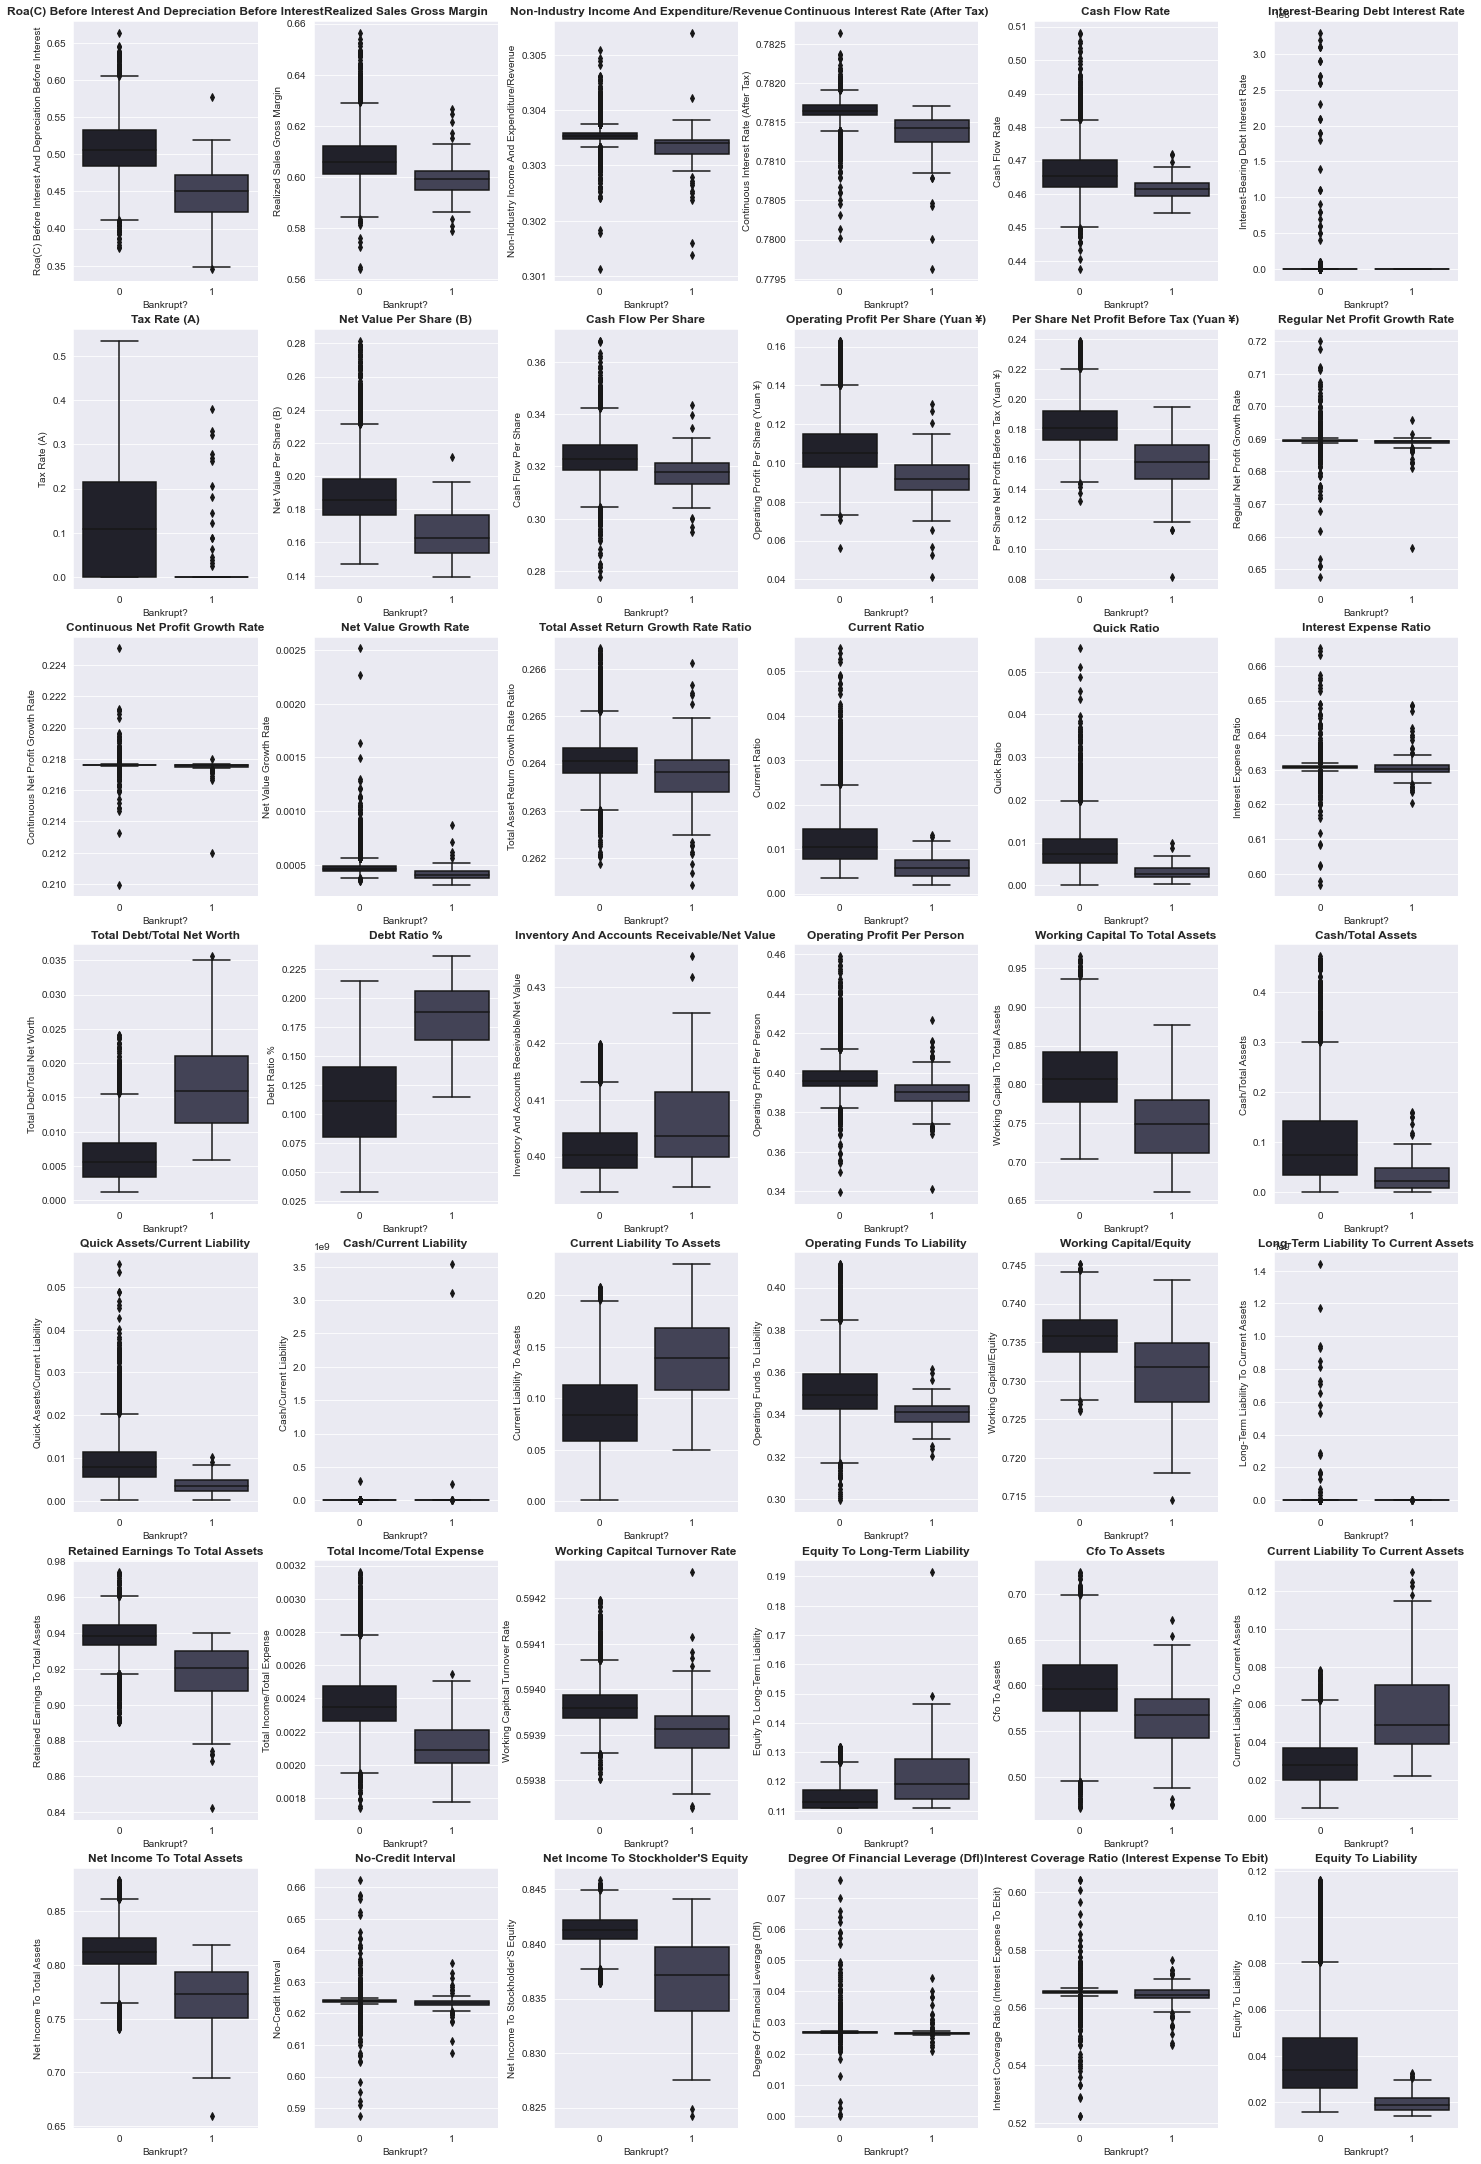

In [39]:
plt.figure(figsize=(20,30))
for i in range(len(num_feat)):
    plt.subplot(7,6,i+1)
    sns.boxplot(x=df2['Bankrupt?'], y=df2[num_feat[i]])
    plt.title(num_feat[i], weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

In [40]:
df2.corrwith(df2['Bankrupt?']).abs().sort_values()

Long-Term Liability To Current Assets                     0.0091
Degree Of Financial Leverage (Dfl)                        0.0096
Interest-Bearing Debt Interest Rate                       0.0122
Interest Expense Ratio                                    0.0153
No-Credit Interval                                        0.0438
Interest Coverage Ratio (Interest Expense To Ebit)        0.0719
Continuous Net Profit Growth Rate                         0.0732
Regular Net Profit Growth Rate                            0.0752
Total Asset Return Growth Rate Ratio                      0.1033
Cash Flow Per Share                                       0.1156
Cash Flow Rate                                            0.1189
Operating Funds To Liability                              0.1206
Net Value Growth Rate                                     0.1213
Cash/Total Assets                                         0.1227
Cash/Current Liability                                    0.1296
Cfo To Assets            

In [41]:
df2.drop(df2.corrwith(df2['Bankrupt?'])[df2.corrwith(df2['Bankrupt?']).abs() < 0.1].index, axis=1, inplace=True)
df2.drop(df2.corrwith(df2['Bankrupt?'])[df2.corrwith(df2['Bankrupt?']).isna()].index, axis=1, inplace=True)

In [42]:
df3 = df1[df2.columns].copy()

In [43]:
num_feat = df3.drop('Bankrupt?', axis=1).columns.to_list()

In [44]:
for i in num_feat:
    for j in df3['Bankrupt?'].unique():
        df3 = group_outlier(df3, i, 'Bankrupt?', j)

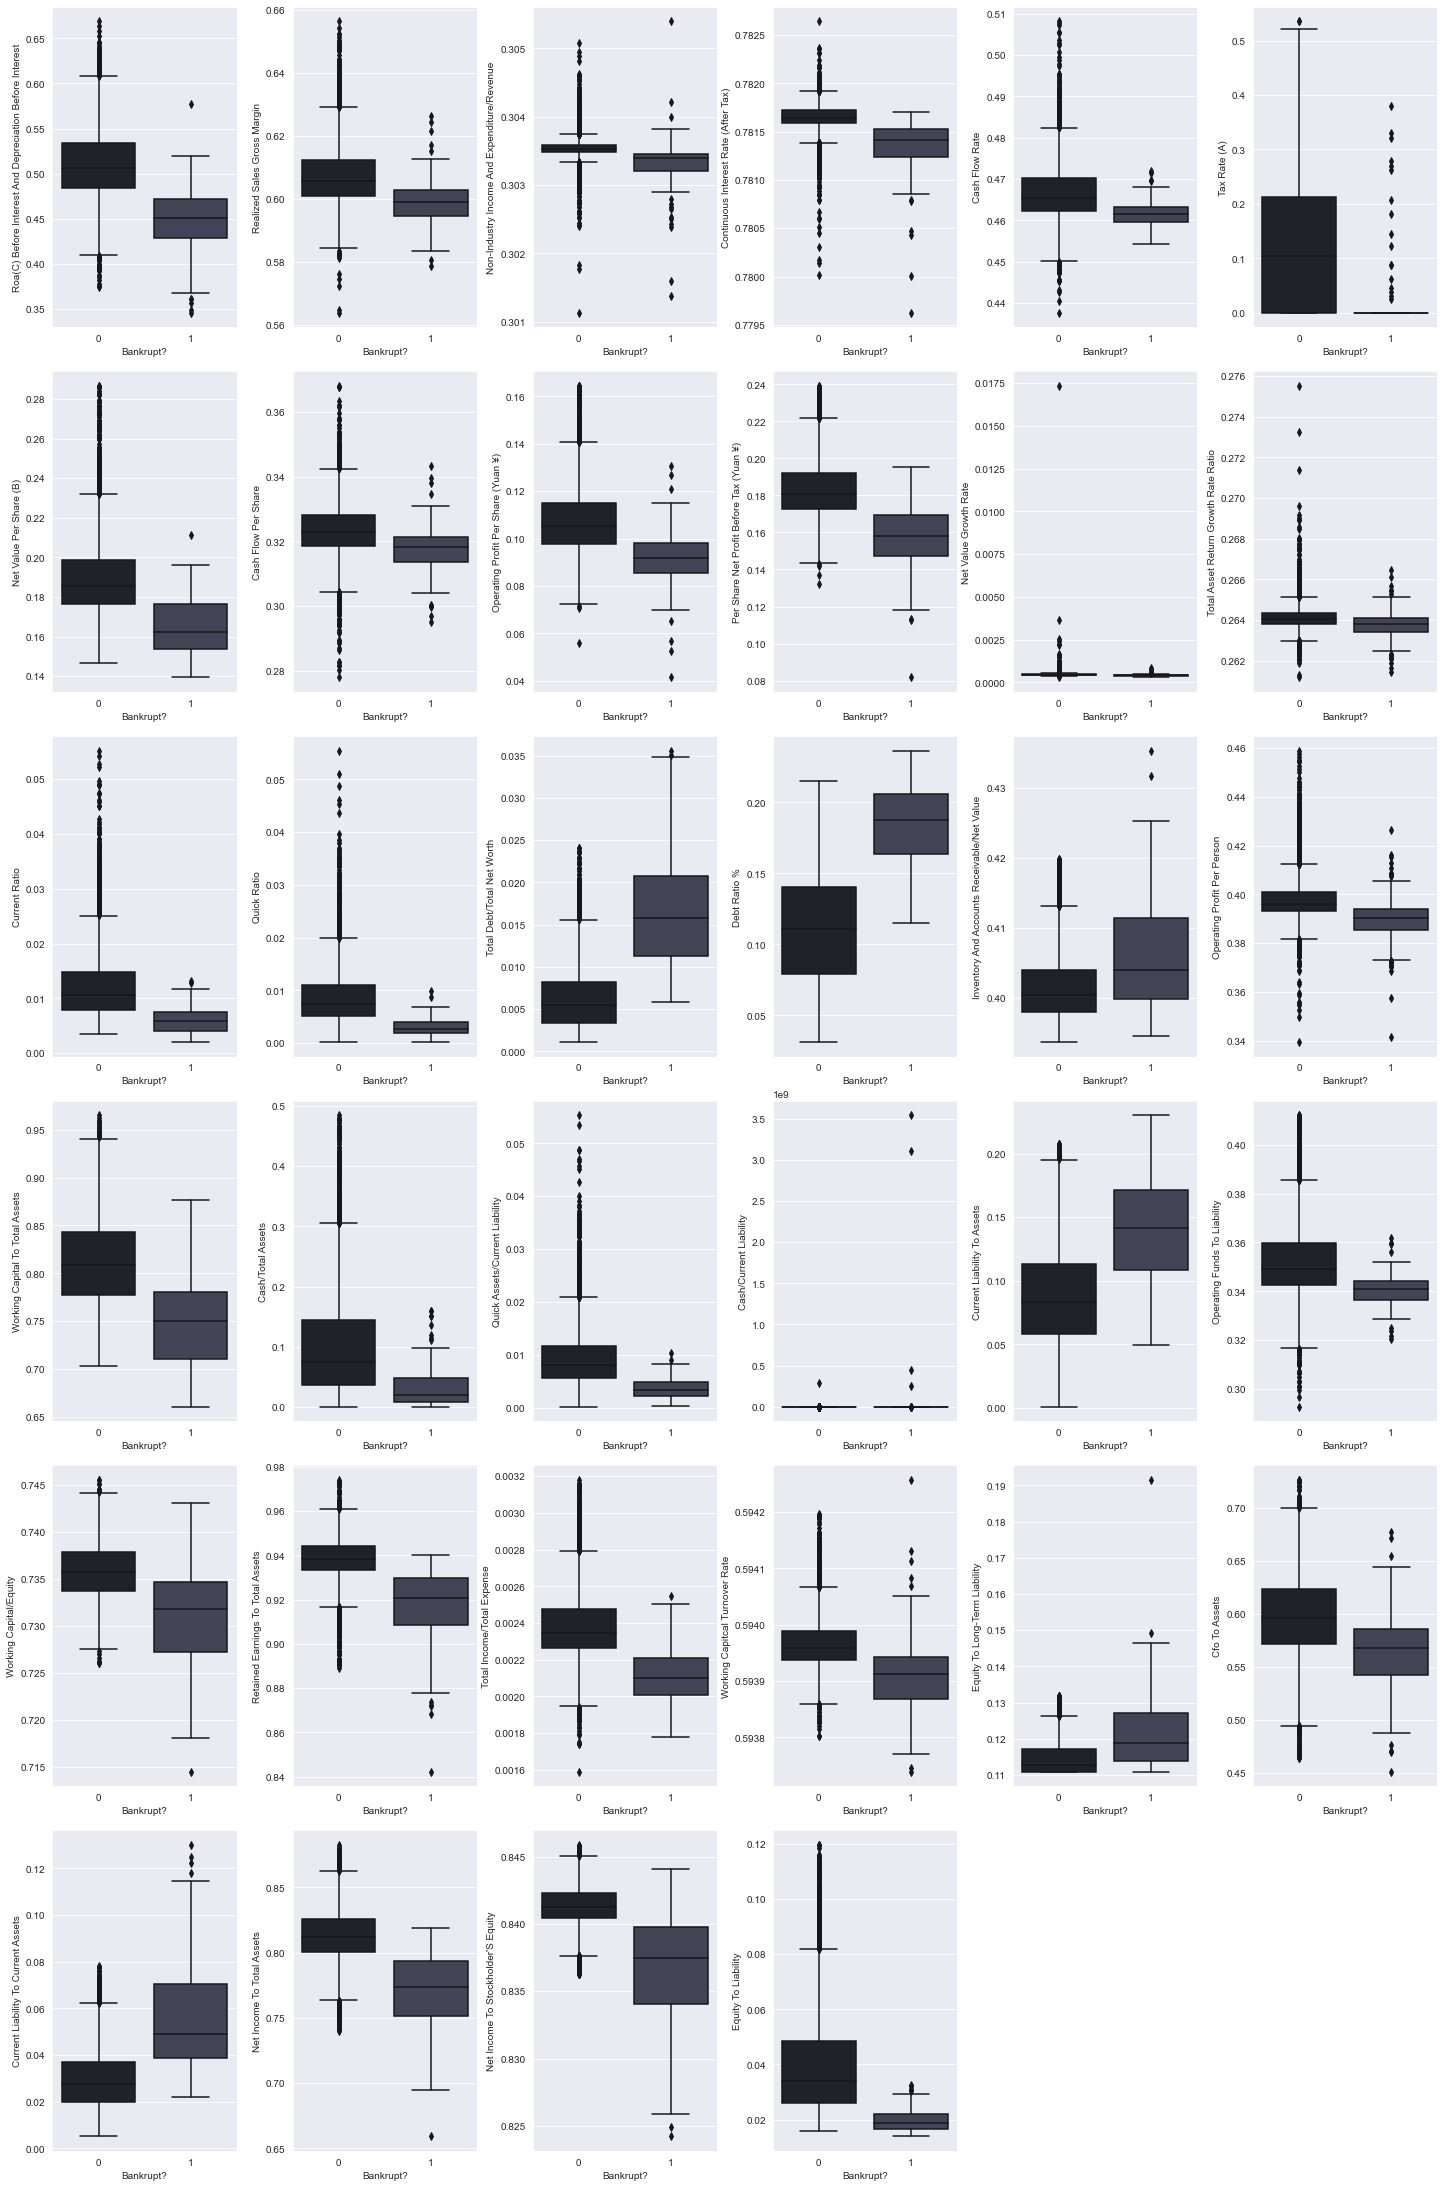

In [45]:
plt.figure(figsize=(20,35))
for i in range(len(num_feat)):
    plt.subplot(7,6,i+1)
    sns.boxplot(x=df3['Bankrupt?'], y=df[num_feat[i]])
plt.tight_layout(pad=0.5)
plt.show()

In [46]:
df3.drop(df3[(df3['Roa(C) Before Interest And Depreciation Before Interest']>0.55)&(df3['Bankrupt?']==1)].index, axis=0, inplace=True)
df3.drop(df3[(df3['Non-Industry Income And Expenditure/Revenue']>0.305)&(df3['Bankrupt?']==1)].index, axis=0, inplace=True)
df3.drop(df3[(df3['Net Value Per Share (B)']>0.2)&(df3['Bankrupt?']==1)].index, axis=0, inplace=True)
df3.drop(df3[df3['Net Value Growth Rate']>0.015].index, axis=0, inplace=True)
df3.drop(df3[df3['Cash/Current Liability']>3000000000].index, axis=0, inplace=True)

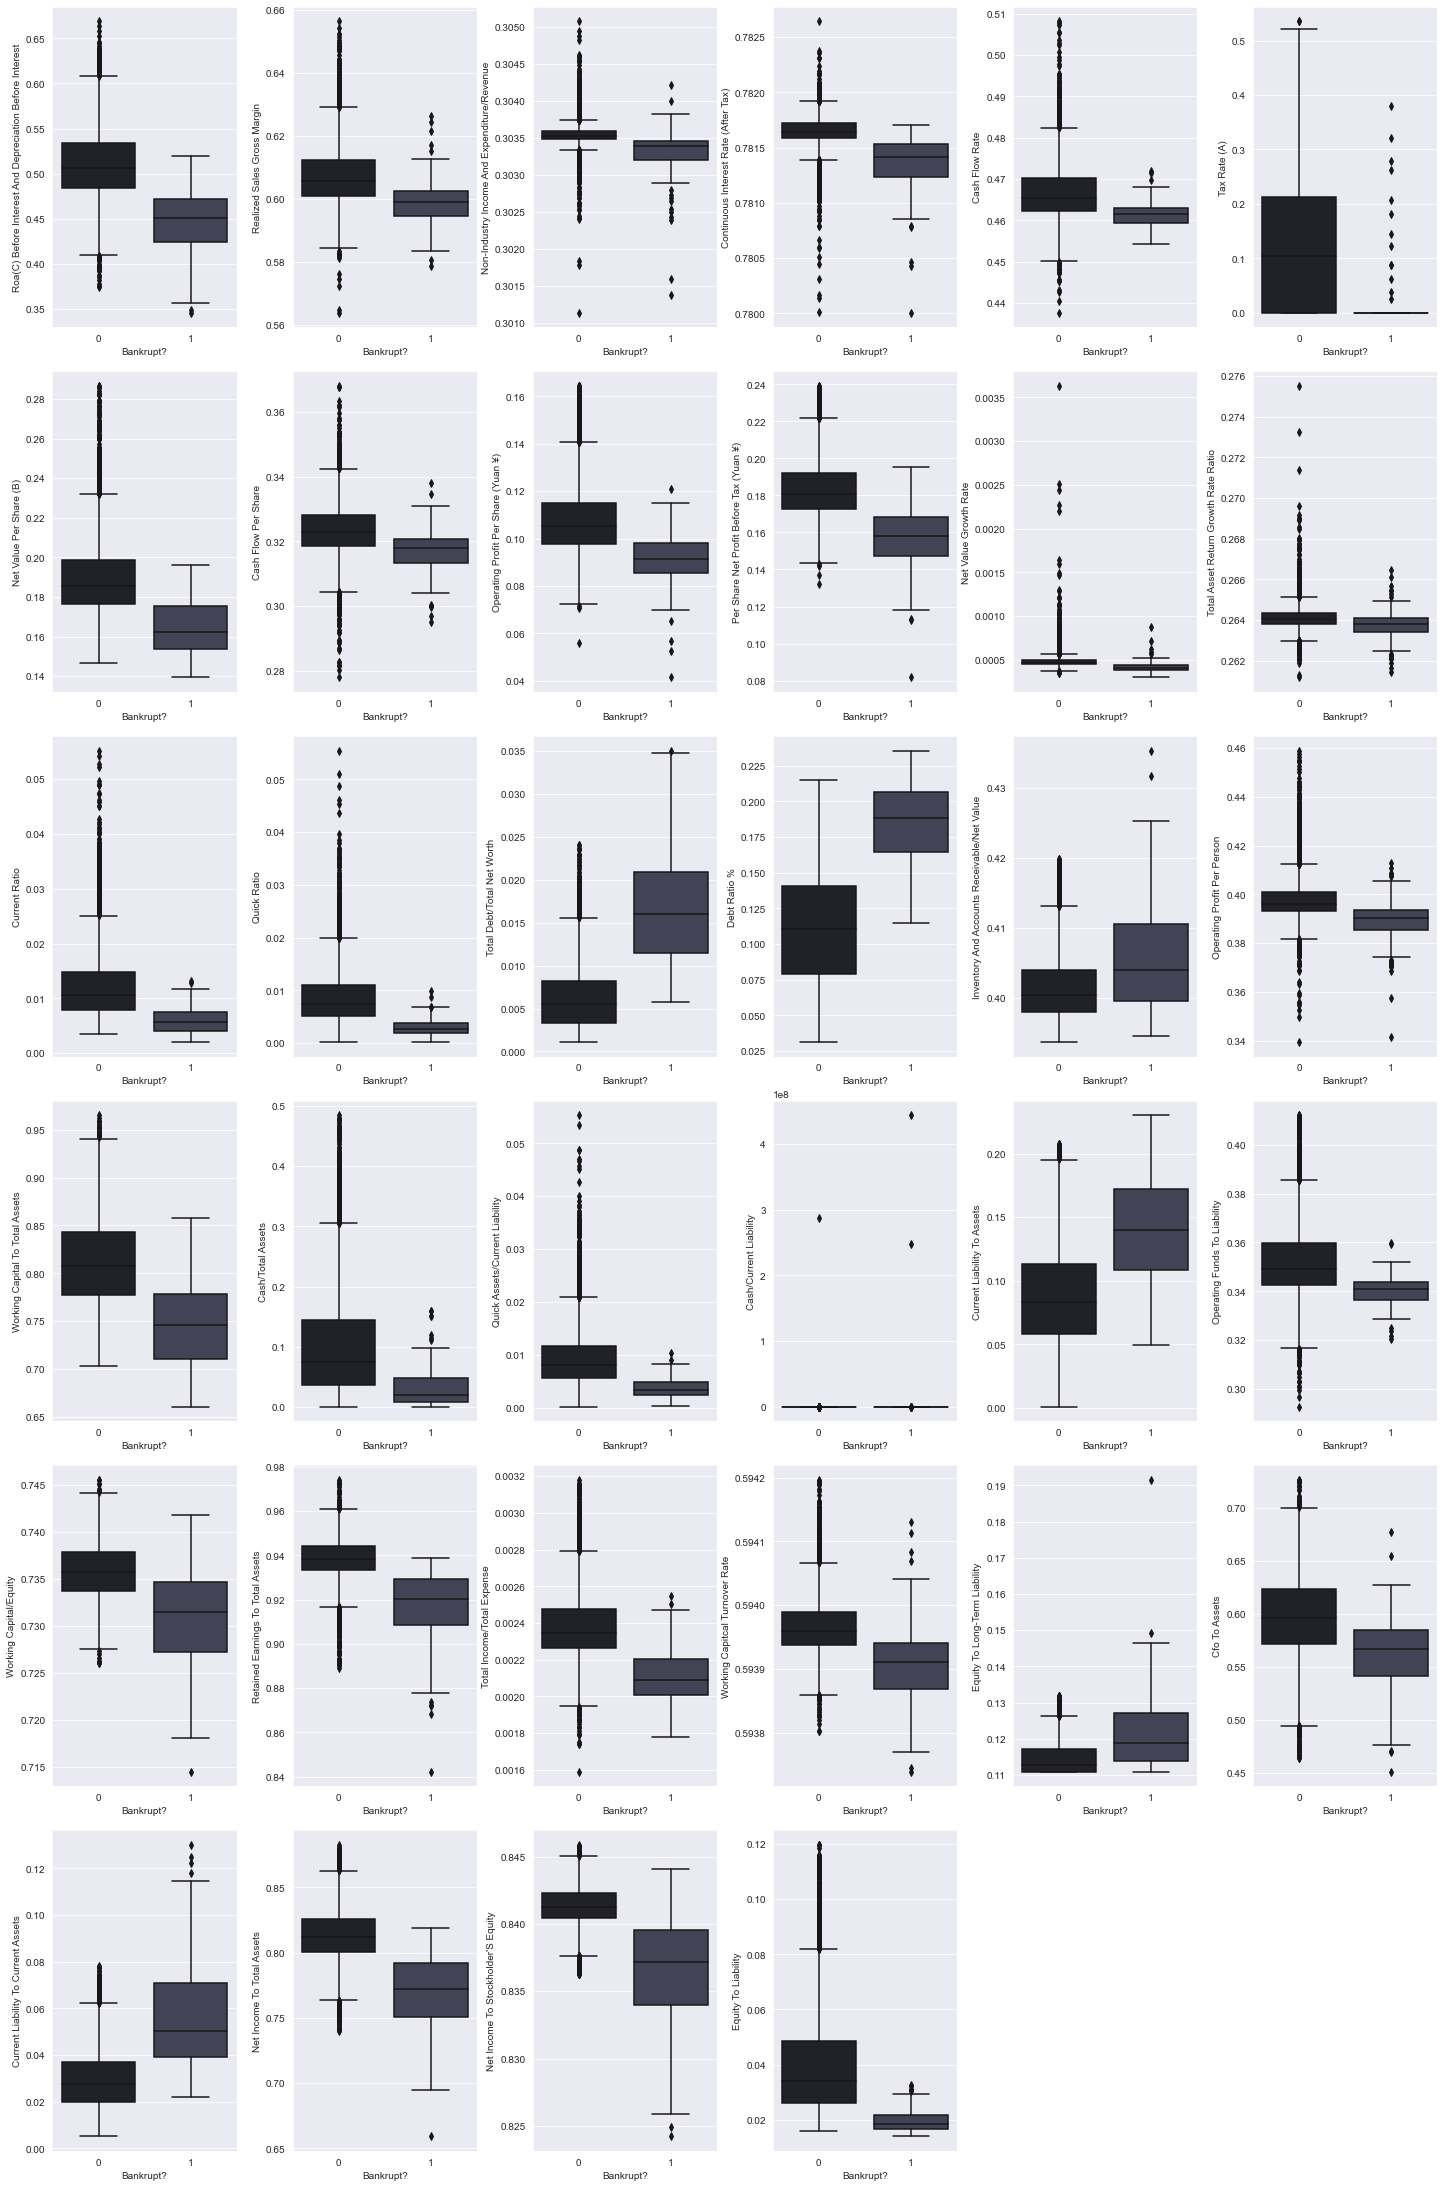

In [47]:
plt.figure(figsize=(20,35))
for i in range(len(num_feat)):
    plt.subplot(7,6,i+1)
    sns.boxplot(x=df3['Bankrupt?'], y=df[num_feat[i]])
plt.tight_layout(pad=0.5)
plt.show()

### Modeling

In [48]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score as cv
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

scaler = StandardScaler()

In [49]:
X = df3.drop('Bankrupt?', axis = 1)
y = df3['Bankrupt?']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [51]:
y_test.sum()

38

In [52]:
X_train_scaled = scaler.fit_transform(X_train).copy()
X_test_scaled = scaler.fit_transform(X_test).copy()

In [53]:
#Oversampling
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)
X_train_scaled_res, y_train_res = SMOTE().fit_resample(X_train_scaled, y_train)

In [54]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

log_reg_score = cv(log_reg, X_train_scaled, y_train, cv=10, n_jobs=-1).mean()
log_reg_res_score = cv(log_reg, X_train_scaled_res, y_train_res, cv=10, n_jobs=-1).mean()

knn_score = cv(knn, X_train_scaled, y_train, cv=10, n_jobs=-1).mean()
knn_res_score = cv(knn, X_train_scaled_res, y_train_res, cv=10, n_jobs=-1).mean()

svc_score = cv(svc, X_train_scaled, y_train, cv=10, n_jobs=-1).mean()
svc_res_score = cv(svc, X_train_scaled_res, y_train_res, cv=10, n_jobs=-1).mean()

rf_score = cv(rf, X_train, y_train, cv=10, n_jobs=-1).mean()
rf_res_score = cv(rf, X_train_res, y_train_res, cv=10, n_jobs=-1).mean()

gb_score = cv(gb, X_train, y_train, cv=10, n_jobs=-1).mean()
gb_res_score = cv(gb, X_train_res, y_train_res, cv=10, n_jobs=-1).mean()

df_model_score = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression SMOTE',
                                        'KNN','KNN SMOTE',
                                        'SVC','SVC SMOTE',
                                        'Random Forest','Random Forest SMOTE',
                                        'Gradient Boosting','Gradient Boosting SMOTE'],
                               'Score':[log_reg_score, log_reg_res_score, knn_score,
                                        knn_res_score, svc_score, svc_res_score,
                                        rf_score, rf_res_score, gb_score, gb_res_score]})

In [55]:
df_model_score.sort_values('Score', ascending=False)

Model  Score
7        Random Forest SMOTE 0.9883
6              Random Forest 0.9862
8          Gradient Boosting 0.9862
0        Logistic Regression 0.9859
2                        KNN 0.9844
4                        SVC 0.9835
9    Gradient Boosting SMOTE 0.9800
3                  KNN SMOTE 0.9675
5                  SVC SMOTE 0.9609
1  Logistic Regression SMOTE 0.9490

##### Random Forest

In [56]:
RF_SMOTE_param = {'n_estimators':[150,200,250],
                  'max_depth':[None,20,25,30],
                  'max_features':[None,'sqrt'],
                  'max_samples':[0.68,0.8]}

RF_SMOTE_gscv = GridSearchCV(rf, RF_SMOTE_param, cv=5, n_jobs=-1)

In [57]:
RF_SMOTE_gscv.fit(X_train_res, y_train_res)
RF_SMOTE_gscv.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', max_samples=0.8,
                       n_estimators=200)

Train Score: 1.0
Test Score: 0.97
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1391
           1       0.51      0.71      0.59        38

    accuracy                           0.97      1429
   macro avg       0.75      0.85      0.79      1429
weighted avg       0.98      0.97      0.98      1429

--------------------------------------------------


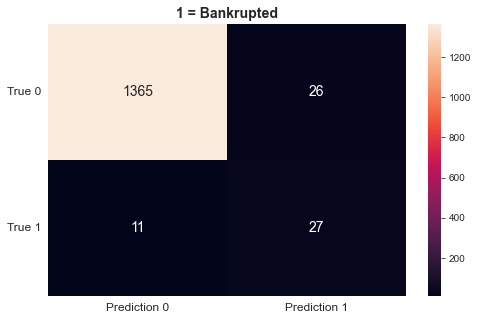

In [61]:
RF_SMOTE_model = RandomForestClassifier(n_estimators=200,
                                        max_depth=20,
                                        max_features='sqrt',
                                        max_samples=0.8,
                                        random_state=42,
                                        n_jobs=-1)
RF_SMOTE_model.fit(X_train_res, y_train_res)
y_pred = RF_SMOTE_model.predict(X_test)
print('Train Score:', RF_SMOTE_model.score(X_train_res, y_train_res).round(2))
print('Test Score:', metrics.accuracy_score(y_test, y_pred).round(2))
print('-'*50)
print(classification_report(y_test, y_pred))
print('-'*50)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            annot_kws={'size':14},
            fmt='d',
            xticklabels=['Prediction 0', 'Prediction 1'],
            yticklabels=['True 0', 'True 1'])
plt.title('1 = Bankrupted', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=360)
plt.show()

模型準確度達97%，破產公司的預測召回率為71%，測試集的38間破產公司中有27間成功被辨認出。